# Principal Component Analysis

Principal Component Analysis is the main application of Singular Value Decomposition in Data Science. Its idea is to reduce the dimensionality of a dataset, while preserving as much variance (information) as possible. If you want to get intuition about SVD and PCA, I highly recommend following resources:

SVD: https://www.youtube.com/watch?v=P5mlg91as1c&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=47                               
PCA: https://www.youtube.com/watch?v=FgakZw6K1QQ

#### Formula for SVD:  $$A = U\Sigma V^T$$
$U$ - contains eigenvectors of $AA^T$      (Because $AA^T=U\Sigma V^T(U\Sigma V^T)^T = U\Sigma^2 U^T$)

$\Sigma $ - contains singular values of A ($\sigma_i = \sqrt\lambda_i$ where $\lambda_i$ is eigenvalue of $A^TA$ and $AA^T$)

$V$ - contains eigenvectors of $A^TA$      (Because $A^TA=(U\Sigma V^T)^TU\Sigma V^T = V\Sigma^2 V^T$)

PCA uses this formula in slighly different way. Before applying PCA to any dataset we have to subract mean of each variable from corresponding entries ( which is for computing covariance matrix). If each column of A represents one variable then $A^TA$ will give information about variation between our vairables and after dividing result by $n-1$ we will call this matrix as Covariance matrix: $$S = \frac{A^TA}{n-1}$$

Eigenvalues of this matrix will tell us how much variance each principal component explains. If we have n varibles, n-k variables will explain more than 90% variance and by removing k principal components we will not face significant information loss. By contrast training and testing new dataset will be faster and even if we keep less than 4 PCs, we will be able to visualize new dataset.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Our Dataset

Has 3 variables: age, height and weight.

In [2]:
data = np.array([[15,169,53],[12,160,48],[13,162,49],[14,165,52],[15,163,54],[15,169,56],[13,163,50],[14,163,51],[16,168,55],[17,166,55],[18,171,58],[11,159,47],[16,163,53],[16,163,53],[18,173,66],[11,160,50],[16,163,53],[17,163,55],[12,168,59],[13,163,53],[16,170,64],[14,166,51],[18,175,59]])
data

array([[ 15, 169,  53],
       [ 12, 160,  48],
       [ 13, 162,  49],
       [ 14, 165,  52],
       [ 15, 163,  54],
       [ 15, 169,  56],
       [ 13, 163,  50],
       [ 14, 163,  51],
       [ 16, 168,  55],
       [ 17, 166,  55],
       [ 18, 171,  58],
       [ 11, 159,  47],
       [ 16, 163,  53],
       [ 16, 163,  53],
       [ 18, 173,  66],
       [ 11, 160,  50],
       [ 16, 163,  53],
       [ 17, 163,  55],
       [ 12, 168,  59],
       [ 13, 163,  53],
       [ 16, 170,  64],
       [ 14, 166,  51],
       [ 18, 175,  59]])

### Step 1: Standardize Data

In [3]:
#Making Zero Mean
data_centered = (data - np.mean(data, axis=0))
#Feature Scaling 
data_normalized= data_centered/np.std(data, axis=0)

<b>Note:</b> Scikit-Learn explains why feature scaling is important before appliying PCA: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

### Visualization

Text(0.5, 0, 'weight')

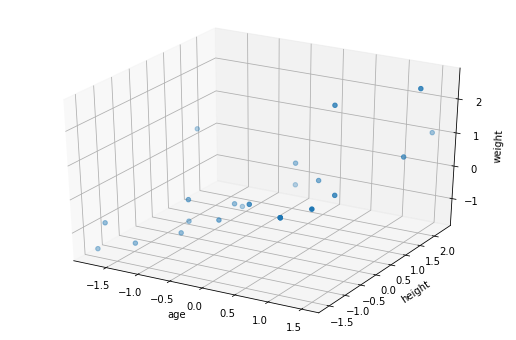

In [4]:
#Visualization
fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(data_normalized[:,0], data_normalized[:,1], data_normalized[:,2])
# Give labels
ax.set_xlabel('age')
ax.set_ylabel('height')
ax.set_zlabel('weight')

### Step 2: Computing Covariance Matrix

In [5]:
#Covariance matrix for variables: age, weight and height
cov_mat = data_normalized.T@data_normalized/(data_normalized.shape[0]-1)
cov_mat

array([[1.04545455, 0.71398136, 0.69996765],
       [0.71398136, 1.04545455, 0.86867932],
       [0.69996765, 0.86867932, 1.04545455]])

### Step 3: Finding Eigenvalues and Eigenvectors of the Covariance matrix

In [6]:
np.linalg.eigh(cov_mat)
eig_vals=np.linalg.eigh(cov_mat)[0]
eig_vecs=np.linalg.eigh(cov_mat)[1]
eig_vals


array([0.17644096, 0.39003501, 2.56988766])

Here eigh function returned eigenvalues in ascending order. In PCA we need eigenvalues in descending order (decreasing importance). Therefore we have to reverse order of eigenvalues.

### Step 4: Reordering eigenvalues and corresponding eigenvectors in order of importance.

In [7]:
#sort the eigenvalues in descending order
eig_vals = eig_vals[::-1]
#similarly sort the eigenvectors
eig_vecs = eig_vecs[:,::-1]

#eig_vals as 3x3 matrix
eig_vals = eig_vals*np.eye(3,3)


In [8]:
eig_vals

array([[2.56988766, 0.        , 0.        ],
       [0.        , 0.39003501, 0.        ],
       [0.        , 0.        , 0.17644096]])

In [9]:
eig_vecs

array([[-0.5484367 , -0.83551241,  0.03370751],
       [-0.59288069,  0.36011253, -0.72028568],
       [-0.58966912,  0.41501563,  0.6928581 ]])

### How much variance is explained by PC1, PC2, and PC3?

In [10]:
Total_var = sum(sum(eig_vals))
PC1_var = (eig_vals[0,0]/Total_var)*100
PC2_var = (eig_vals[1,1]/Total_var)*100
PC3_var = (eig_vals[2,2]/Total_var)*100

print('PC1 explains {}%, PC2 explains {}%, PC3 explains {}% of total variation'.format(round(PC1_var,2),round(PC2_var,2),round(PC3_var,2)))

PC1 explains 81.94%, PC2 explains 12.44%, PC3 explains 5.63% of total variation


#### PC1 and PC2 together explains 93.38% of total variation which is enough for us. So, we can just use first two components.

### Step 5: Represent data in the lower dimension.

In [11]:
Reduced_data = data_normalized@eig_vecs[:,:2]
Reduced_data

array([[-0.42371297,  0.12439286],
       [ 2.27192519,  0.07462925],
       [ 1.60114314, -0.05537243],
       [ 0.53152836,  0.0816155 ],
       [ 0.30136336, -0.30364422],
       [-0.80861761,  0.39529299],
       [ 1.33061195,  0.12131713],
       [ 0.9442892 , -0.18146359],
       [-0.79610762, -0.17447734],
       [-0.76966953, -0.74033714],
       [-2.12374361, -0.43057017],
       [ 2.80047758,  0.29102045],
       [ 0.1716437 , -0.78702503],
       [ 0.1716437 , -0.78702503],
       [-3.43461527,  0.46460922],
       [ 2.2733433 ,  0.6483101 ],
       [ 0.1716437 , -0.78702503],
       [-0.34298059, -0.9995057 ],
       [-0.277229  ,  1.75904589],
       [ 0.94570731,  0.39221726],
       [-2.23528083,  0.81100209],
       [ 0.51760026,  0.07770498],
       [-2.82096374,  0.00528795]])

Text(0, 0.5, 'PC2')

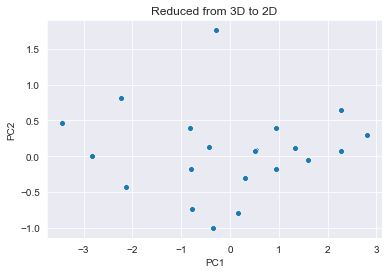

In [12]:
#Visualizing standrized version
sns.set_style('darkgrid')
sns.scatterplot(x=Reduced_data[:,0],y=Reduced_data[:,1])
plt.title('Reduced from 3D to 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# All process in one function

In [13]:
def PCA(data, n_components=2):
    #step 1
    data_normalized = (data-np.mean(data,axis=0))/np.std(data, axis=0)
    #step 2
    cov_mat = (data_normalized.T@data_normalized)/(data_normalized.shape[0]-1)
    #step 3
    eig_vals = np.linalg.eigh(cov_mat)[0]
    eig_vecs = np.linalg.eigh(cov_mat)[1]
    #step 4
    eig_vals = eig_vals[::-1]
    eig_vecs = eig_vecs[:,::-1]
    #step 5
    reduced_data = data_normalized@eig_vecs[:,:n_components]
    
    return reduced_data